In [1]:
import numpy as np;
import xarray as xr;
import matplotlib.pyplot as plt;
import h5_reader_xr as reader;
import gysela_utilities as utils;
from scipy import signal;

# Styling.
plt.style.use("ggplot");

In [2]:
time_step = reader.fetch_data_from_h5("C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc\\Phi2D_d00000.h5")["deltat"].values;
data_arrays = reader.compile_data_from_directory("Phirth_n0", "C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc");

C:\Users\sethx\AppData\Local\Temp\ipykernel_25188\2176469068.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2500);


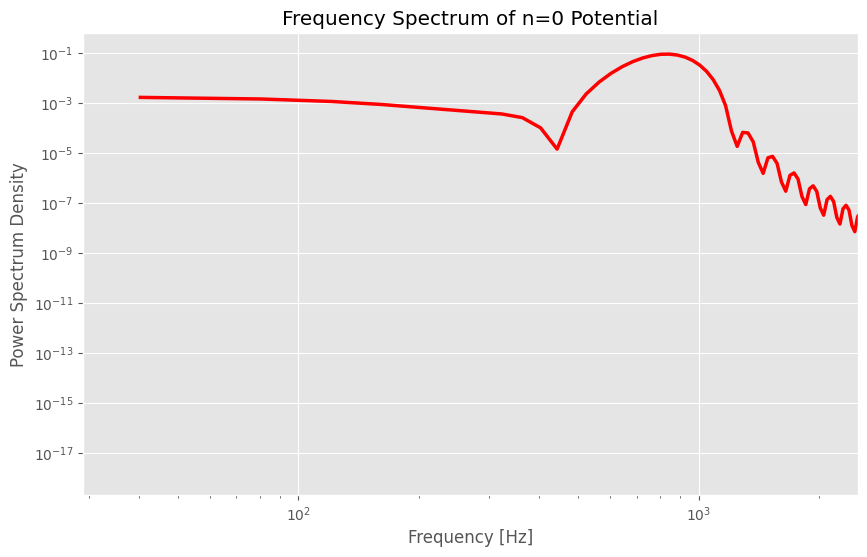

In [ ]:
def plot_power_spectrum_density(phi2D_list):
	# TODO: should have find_peaks functionality
	# Signal isolation and data processing.
	hovmoller_matrix = utils.generate_poloidally_averaged_time_series(phi2D_list);
	frequencies, power_spectrum_density = utils.map_power_spectrum(hovmoller_matrix, 40, time_step.flatten()[0]);
	frequencies = utils.convert_to_real_frequency(frequencies)/(2 * np.pi);
	
	# Figure plotting logic.
	plt.figure(figsize = (10, 6));
	plt.loglog(frequencies, power_spectrum_density, label = "PSD", color = "red", lw = 2.5);
	plt.xlim(0, 2500);
	plt.xlabel("Frequency [Hz]");	
	plt.ylabel("Power (arb)");
	plt.title("Frequency Spectrum of n=0 Potential");
	plt.show();

plot_power_spectrum_density(data_arrays);